# DAV 6150 Module 3 Assignment: Cleaning “Messy” Data

## Introduction

The data set will be used is comprised of information on more than 12,700 wines, with many of the attributes being related to the chemical composition of the wines. We will be exploring and “cleaning” a data set that suffers from a variety of data integrity + usability issues.

In this assignment, I will firstly look for any attribute in the dataset which contains missing values, decide if it needs to be deleted or imputed, and what strategy I will use. Then if any, I will aplly useful codes/functions to accomplish the clean up of the data. 



## Exploratory Data Analysis

In [1]:
# import pandas
import pandas as pd

# read the data set from Github repository and load it into a Pandas dataframe
filename = "https://raw.githubusercontent.com/nananov/DAV-6150/master/M3_Data.csv"
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [2]:
# use isnull function to detect missing values in the given series object
df.isnull().mean() * 100

Unnamed: 0             0.000000
INDEX                  0.000000
TARGET                 0.000000
FixedAcidity           0.000000
VolatileAcidity        0.000000
CitricAcid             0.000000
ResidualSugar          4.814381
Chlorides              4.986323
FreeSulfurDioxide      5.056663
TotalSulfurDioxide     5.330207
Density                0.000000
pH                     3.087143
Sulphates              9.456819
Alcohol                5.103556
LabelAppeal            0.000000
AcidIndex              0.000000
STARS                 26.252442
dtype: float64

We can see that 8 attributes have missing values, respectively ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, pH, Sulphates, Alcohol, and STARS. 

In [5]:
# install missingno package
pip install missingno

Note: you may need to restart the kernel to use updated packages.


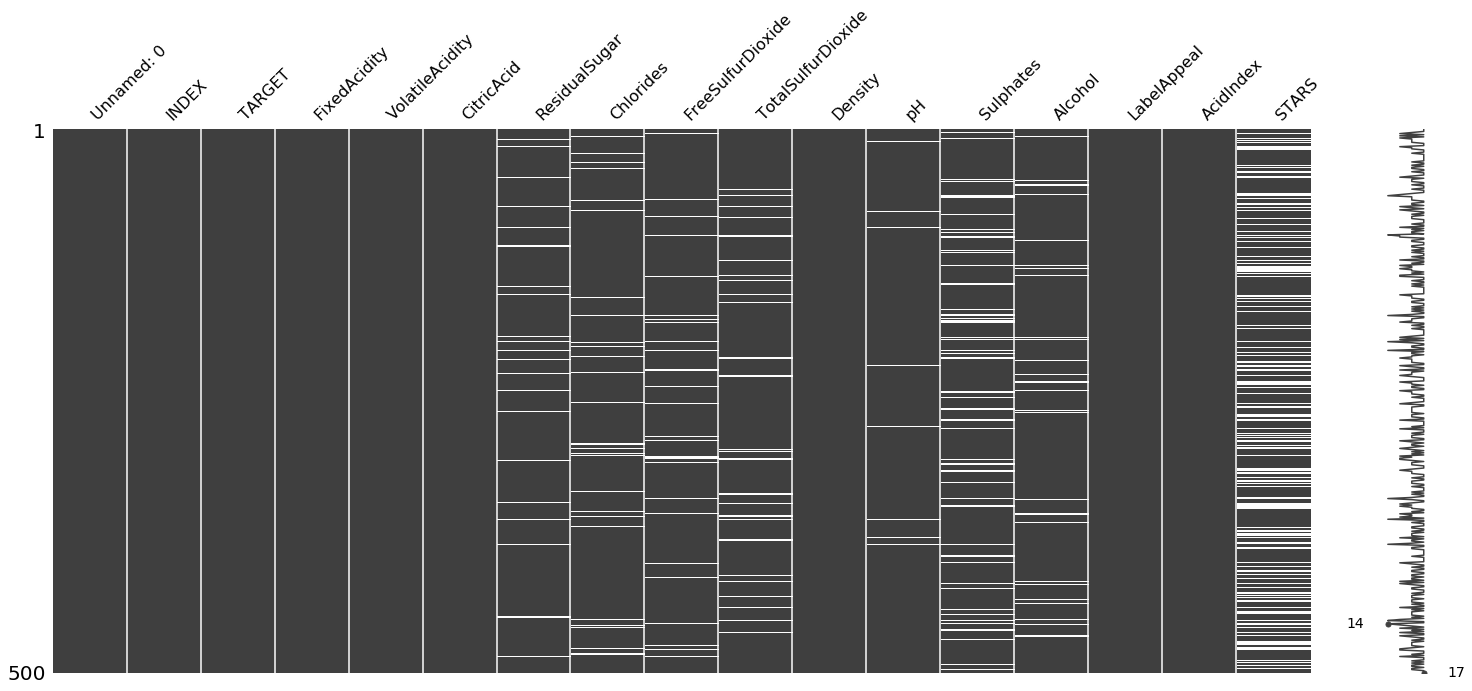

In [7]:
# use missingno to provide the ability to understand the distribution of missing values through informative visualizations
orig_df = df
import missingno as msno
ax = msno.matrix(orig_df.sample(500))
ax

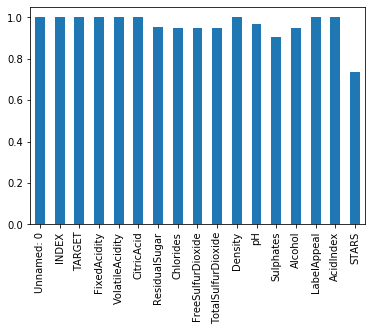

In [8]:
# use a barchart to show a visualization for how many data is missing in a general view
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)

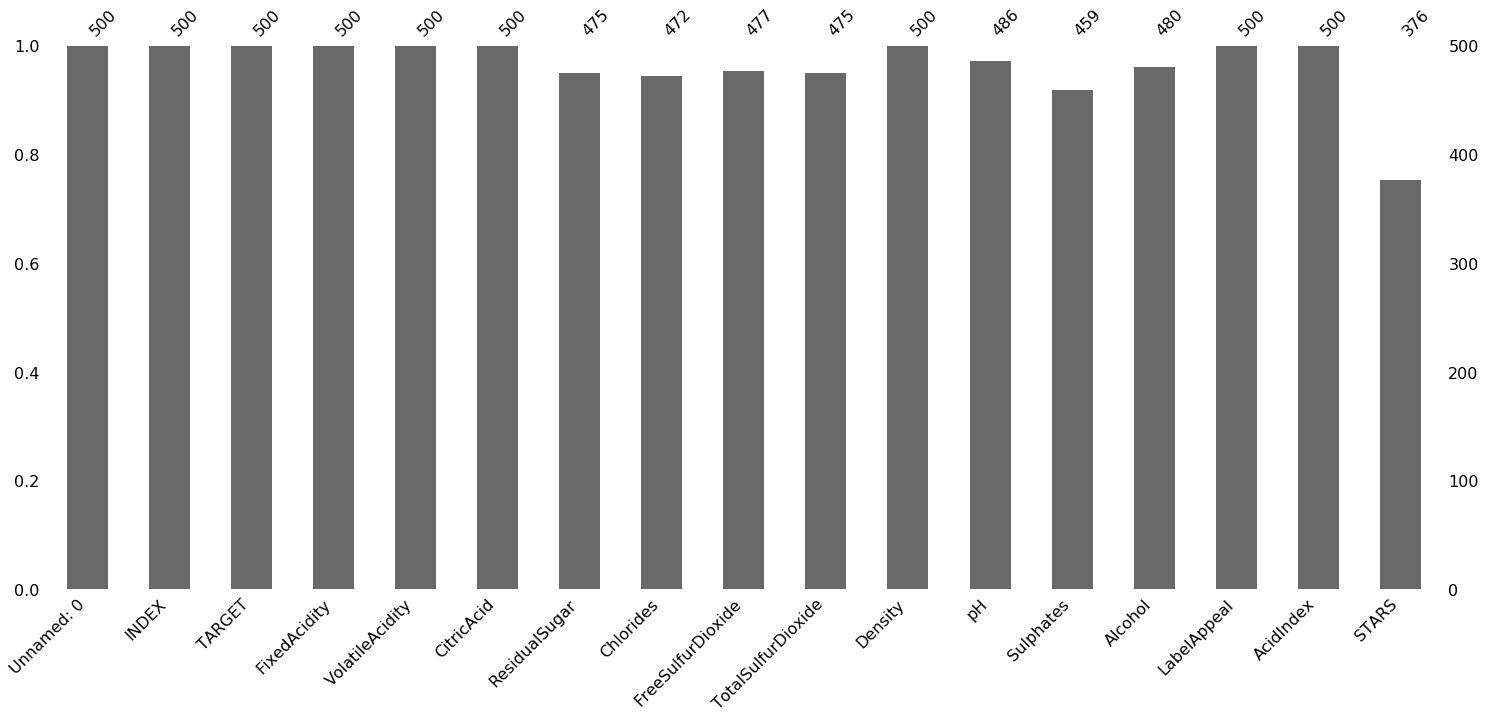

In [9]:
# see exactly the amount of missing data in 500 samples
ax = msno.bar(orig_df.sample(500))

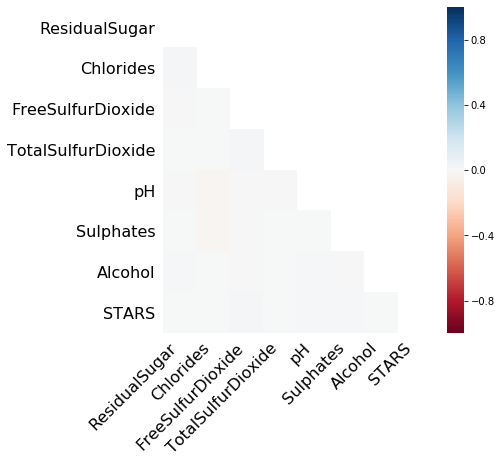

In [10]:
# use a heatmap to identify correlations of the nullity between each of the different columns
ax = msno.heatmap(df, figsize=(6, 6))

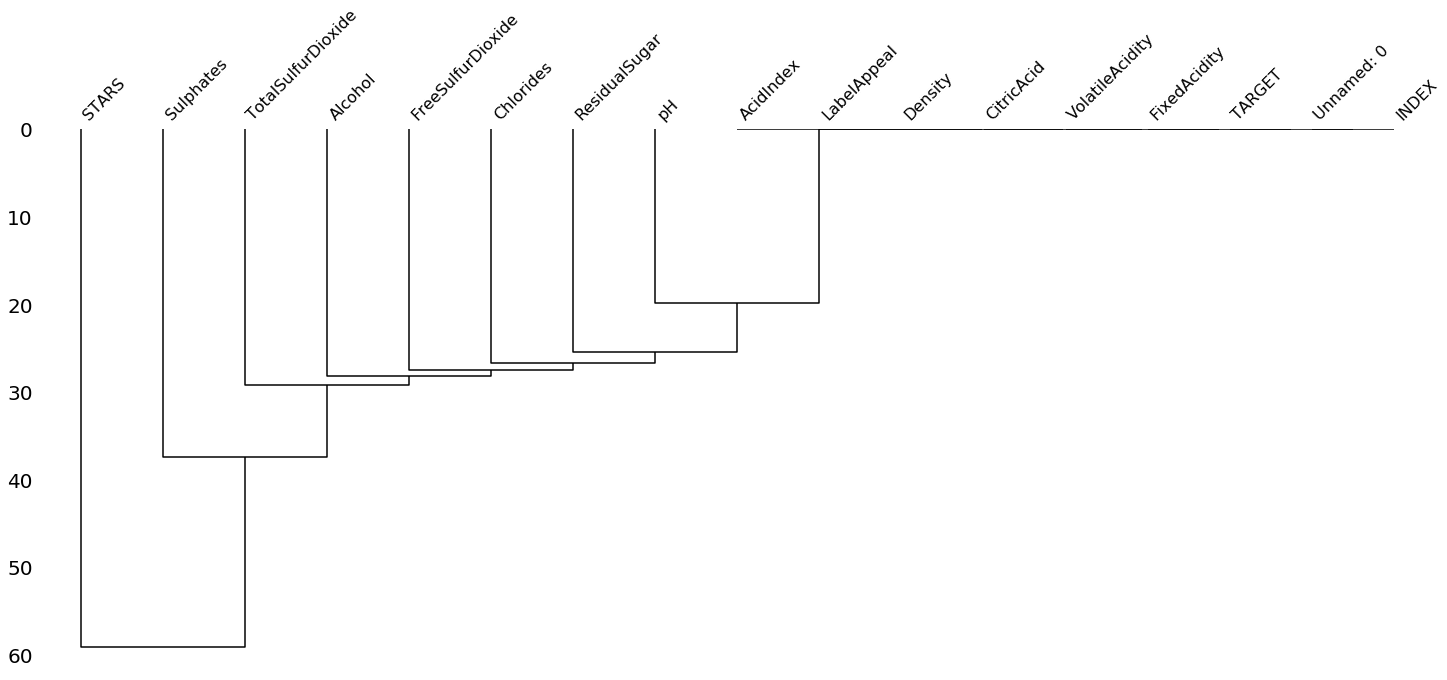

In [11]:
# use a dendrogram to bin variables against one another by their nullity correlation
ax = msno.dendrogram(df)

According to the visualizations above, we can see that the attribute STARS is the one which has the most missing values, its not-null values contributes to a percentage lower than 80%, while all other attributes have this higher than 90%. Therefore I decide to examine and impute this attribute.  

Before further steps of imputing, let's do some simple statistical summary for the variable which has the most missing values. 

In [15]:
# get summary statistics for the STARS variable
df.STARS.describe()

count    9436.000000
mean        2.041755
std         0.902540
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: STARS, dtype: float64

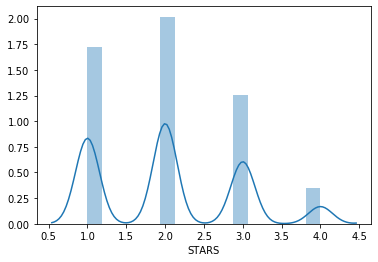

In [16]:
# import seaborn for graphics
import seaborn as sns

# create a graphic showing the distribution of the non-null STARS values
sns.distplot(df[df["STARS"].notnull()].STARS)

We notice that the distribution is slightly right skewed. 

## Data Preparation

In [40]:
# use dropna to drop rows which contain missing values
# drop the column which has the most missing values
df1 = df.dropna()
df1 = df.drop(columns="STARS")
df1 = df.dropna(axis=1)

# use SimpleImputer to impute missing values
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(
    include="number"
).columns

# the attribute STARS contains intergers from 1-4
# we use median for imputing so it won't impact on the distribution too much
im = SimpleImputer(stratege="median")  
imputed = im.fit_transform(df[num_cols])

After imputing, we actually got a ndarray type for result. To make it easier for applying functions, I decide to convert to dataframe, and name any column that will be used in this case. 

In [50]:
# convert imputed to dataframe
df1 = pd.DataFrame(imputed)
df1.columns = ['','','','','','','','','','','','','','','','','STARS']
df1.head()

,,,,,,,,,,,,,,,,,STARS
0,0.0,1.0,3.0,3.2,1.160,0.98,54.2,0.567000,106.679042,268.0,0.99280,3.33,0.59,9.900000,0.0,8.0,2.0
1,1.0,2.0,3.0,4.5,0.160,0.81,26.1,0.425000,15.000000,327.0,1.02792,3.38,0.70,10.523778,-1.0,7.0,3.0
2,2.0,4.0,5.0,7.1,2.640,0.88,14.8,0.037000,214.000000,142.0,0.99518,3.12,0.48,22.000000,-1.0,8.0,3.0
3,3.0,5.0,3.0,5.7,0.385,0.04,18.8,0.425000,22.000000,115.0,0.99640,2.24,1.83,6.200000,-1.0,6.0,1.0
4,4.0,6.0,4.0,8.0,0.330,1.26,9.4,0.222559,167.000000,108.0,0.99457,3.12,1.77,13.700000,0.0,9.0,2.0


## Prepped Data Review

After converting to dataframe, I will do something same as what I did before imputing, to see if the procedure was successful. We will see the number of observations and the distribution. 

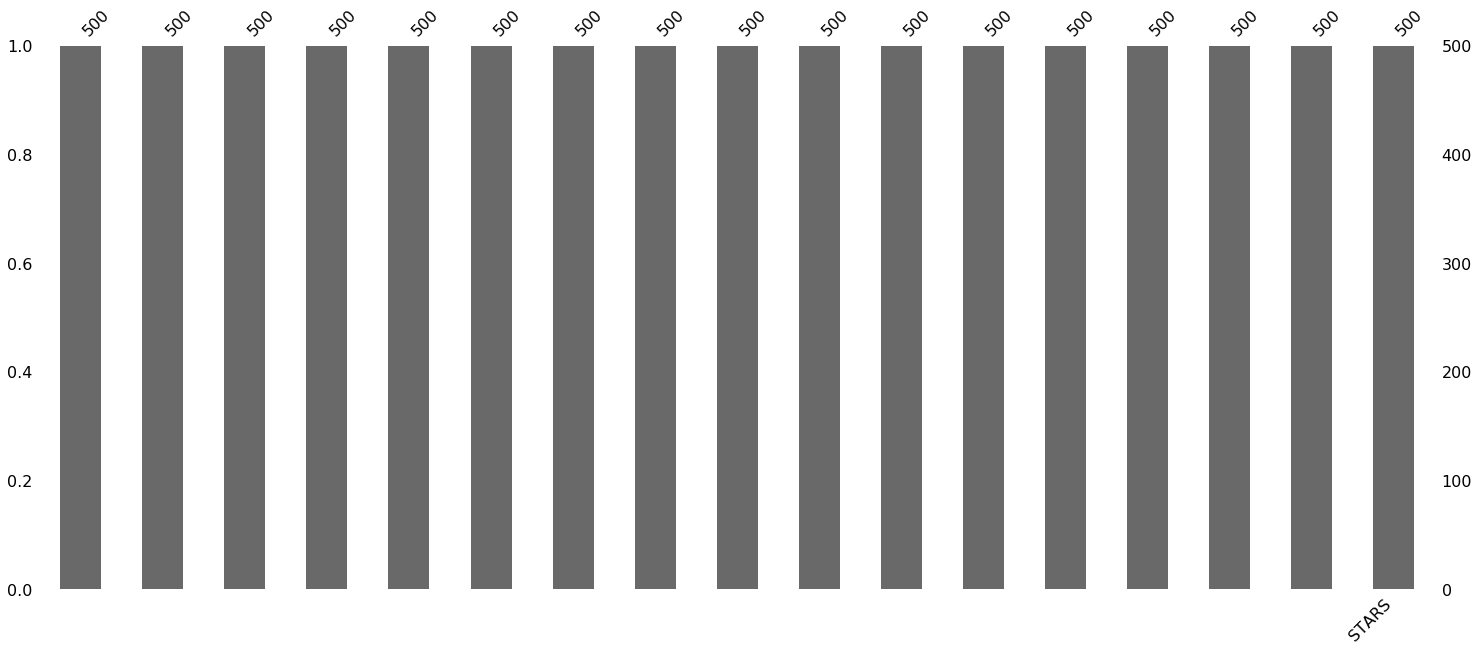

In [51]:
# re-run the barchart to see the amount of missing values
ax = msno.bar(df1.sample(500))

We see the attribute STARS does not have missing values in 500 samples now. 

In [48]:
# re-run the summary statistics for STARS after imputer
imputed.STARS.describe()

count    12795.000000
mean         2.041755
std          0.775058
min          1.000000
25%          2.000000
50%          2.000000
75%          2.041755
max          4.000000
Name: STARS, dtype: float64

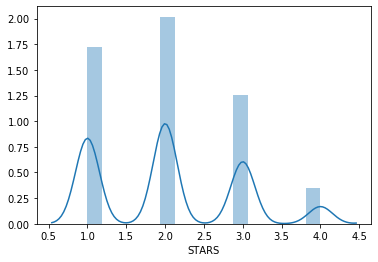

In [52]:
# re-run the distribution plot for STARS after imputer
sns.distplot(df[df["STARS"].notnull()].STARS)

Now we do not have any missing values in the attribute. The data is ranged from 1 to 4 and has the same mean before imputer, with a smaller standard deviation. 

The distribution is still slightly right skewed as before. 


## Conlusion
In this assignment, we are dealing with a "messy" dataset with missing values and trying to clean it up for later use in machine learning. I find that it is not a easy stuff to clean up a dataset, as we need to consider about what each attribute represent for and what kind of filling data will make sense. We need to think it deeply step by step and seek for a solution in each specific case of  the data cleaning thing. 